<a href="https://colab.research.google.com/github/davidabelin/capstone_project_udacity_mle/blob/main/connectx_agents_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ConnectX - Legion Of Agents - Arena

This notebook contains a lot of different agents from different sources.    
In the **Comparison In Battle** section, we also added a comparison in a fair battle of each agent with each in 1 round with 1000 steps.

<a id="100"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Example Using The kaggle_environments For Testing Agents<center><h2>

We need to import the library for creating environments and simulating agent battles

In [1]:
# Upgrade kaggle_environments using pip before import
!pip install kaggle_environments

     |████████████████████████████████| 112kB 7.4MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
ERROR: nbclient 0.5.1 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Loading environment football failed: No module named 'gfootball'


Create a rock-paper-scissors environment (RPS), and set 1000 episodes for each simulation

In [3]:
env = make("connectx", configuration={"episodeSteps": 1000})

Let's start simulating the battle invert_my_last_action vs copy_opponent_agent

In [ ]:
# Battle example: invert_my_last_action vs copy_opponent_agent
env.run(["pruner_v5.py", "deep_lookahead.py"])

env.render(mode="ipython", width=500, height=400)

Get score for 2 agents in the battle

In [6]:
evaluate(
    "connectx", 
    ["pruner_v5.py", "deep_lookahead.py"], 
    configuration={"episodeSteps": 1000}
)

env.render(mode="ipython", width=500, height=400)

[[1, -1]]

In [101]:
def get_win_percentages(agent1, agent2, n_rounds=10):
    config = {'rows': 6, 'columns': 7, 'inarow': 4}        
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2) 
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    a1_score = outcomes.count([1,-1])/len(outcomes)
    a2_score = outcomes.count([-1,1])/len(outcomes)
    
    #print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 3))
    #print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 3))
    return round(a1_score,3), round(a2_score,3)

In [85]:
a, b = get_win_percentages(env.agents.negamax,"quick_pick_submit.py", n_rounds=10)

Agent 1 Win Percentage: 0.1
Agent 2 Win Percentage: 0.8


In [86]:
a, b

(0.1, 0.8)

<a id="101"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Comparison In Battle<center><h2>


In [9]:
#! ls *.py

deep_lookahead.py	  prunerBD.py	    quick_pick_submit.py
experimental_agent_v6.py  pruner_v5.py	    test_agent_v1.py
experimental_agent_v7.py  prunerZ_ready.py  test_agent_v4.py
experimental_agent_v8.py  quick_look_v0.py  test_agent_v6.py
heuristic_v8.py		  quick_look_v5.py  test_agent_v9.py


In [107]:
list_names = ["quick_pick_submit.py",
            "quick_look_v0.py",
            "quick_look_v5.py",
            "deep_lookahead.py",
            "heuristic_v8.py",
            "experimental_agent_v6.py",
            "experimental_agent_v7.py",
            "experimental_agent_v8.py",
            "pruner_v5.py",
            "prunerBD.py",
            "prunerZ_ready.py",
            "test_agent_v1.py",
            "test_agent_v4.py",
            "test_agent_v6.py",
            "test_agent_v9.py",
            env.agents.negamax,
            env.agents.random]

list_agents = list_names

In [99]:
test_list = ["quick_pick_submit.py",
             "test_agent_v4.py",
             "test_agent_v6.py",
             env.agents.negamax,
             env.agents.random,
             "test_agent_v9.py"]

list_names = test_list
list_agents = test_list

In [ ]:
print("Simulating battles. Please stand by...")
scores = np.zeros((len(list_names), len(list_names)), dtype=float)
config = {'rows': 6, 'columns': 7, 'inarow': 4}

for ind_agent_1 in range(len(list_names)):
    for ind_agent_2 in range(ind_agent_1 + 1, len(list_names)):
        print(list_names[ind_agent_1],"vs",list_names[ind_agent_2])

        score1, score2 = get_win_percentages(list_agents[ind_agent_1],
                                             list_agents[ind_agent_2],
                                             10)
        
        scores[ind_agent_1, ind_agent_2] = score1
        scores[ind_agent_2, ind_agent_1] = score2
        
        print(scores[ind_agent_1, ind_agent_2],":",scores[ind_agent_2, ind_agent_1])

Simulating battles. Please stand by...
quick_pick_submit.py vs quick_look_v0.py
0.5 : 0.5
quick_pick_submit.py vs quick_look_v5.py
0.5 : 0.5
quick_pick_submit.py vs deep_lookahead.py
0.5 : 0.5
quick_pick_submit.py vs heuristic_v8.py
0.8 : 0.2
quick_pick_submit.py vs experimental_agent_v6.py
0.5 : 0.5
quick_pick_submit.py vs experimental_agent_v7.py
1.0 : 0.0
quick_pick_submit.py vs experimental_agent_v8.py
0.5 : 0.5
quick_pick_submit.py vs pruner_v5.py
0.8 : 0.2
quick_pick_submit.py vs prunerBD.py
0.9 : 0.1
quick_pick_submit.py vs prunerZ_ready.py
0.5 : 0.5
quick_pick_submit.py vs test_agent_v1.py
0.5 : 0.5
quick_pick_submit.py vs test_agent_v4.py
0.5 : 0.5
quick_pick_submit.py vs test_agent_v6.py
0.5 : 0.5
quick_pick_submit.py vs test_agent_v9.py
0.5 : 0.5
quick_pick_submit.py vs <function negamax_agent at 0x7f681f42f9d8>
1.0 : 0.0
quick_pick_submit.py vs <function random_agent at 0x7f681f42f950>
1.0 : 0.0
quick_look_v0.py vs quick_look_v5.py
0.5 : 0.5
quick_look_v0.py vs deep_lookahe

In [ ]:
scores

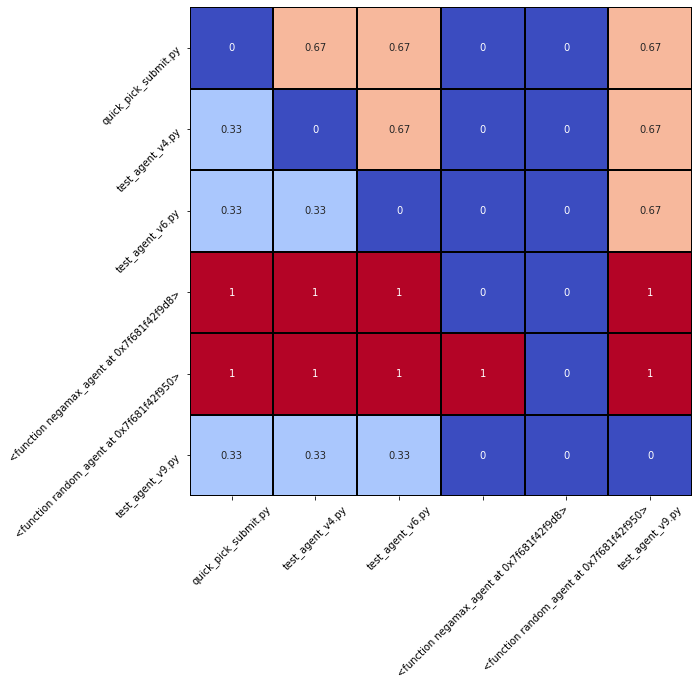

In [105]:
df_scores = pd.DataFrame(
    scores, 
    index=list_names, 
    columns=list_names,
)

plt.figure(figsize=(10, 10))
sns.heatmap(
    df_scores, annot=True, cbar=False, cmap='coolwarm', linewidths=1, linecolor='black')#, fmt="d")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=45, fontsize=10);

<a id="102"></a>
<h2 style='background:#FBE338; border:0; color:black'><center>Test Your Own Agent<center><h2>


Set here your own agent

In [ ]:
def your_agent(observation, configuration):
    return 0

In [42]:
scores = np.zeros((len(list_names), 1), dtype=int)

In [43]:
for ind_agent_1 in range(len(list_names)):

    current_score = evaluate(
        "connectx", 
        ["negamax", list_agents[ind_agent_1]], 
        configuration={"episodeSteps": 1000}
    )

    scores[ind_agent_1, 0] = current_score[0][0]

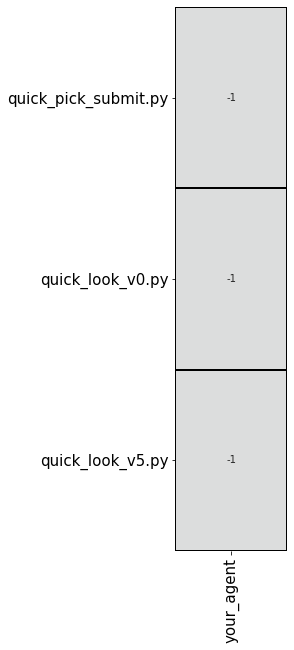

In [44]:
df_scores = pd.DataFrame(
    scores, 
    index=list_names, 
    columns=["your_agent"],
)


plt.figure(figsize=(2, 10))
sns.heatmap(
    df_scores, annot=True, cbar=False, 
    cmap="coolwarm", linewidths=1, linecolor="black", 
    fmt="d", vmin=-500, vmax=500,
)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=360, fontsize=15);

In [45]:
df_scores

,your_agent
quick_pick_submit.py,-1
quick_look_v0.py,-1
quick_look_v5.py,-1


In [47]:
env.render(mode="ipython")